In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import highlight_text

In [15]:
# the famous import font code to use Andale Mono
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

In [16]:
#import data
df = pd.read_csv('../../data/ProgressivePass/ProgressivePass.csv')

In [17]:
#set default colors
text_color = 'white'
background = '#313332'

In [18]:
#look at top of dataframe
#先頭から10名表示する
df.head(10)

,Player,Pos,Squad,90s,Prog
0,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,11.7,76
1,Tammy Abraham\Tammy-Abraham,FW,Chelsea,10.6,11
2,Che Adams\Che-Adams,FW,Southampton,19.0,38
3,Tosin Adarabioyo\Tosin-Adarabioyo,DF,Fulham,18.0,36
4,Adrián\Adrian,GK,Liverpool,2.0,0
5,Sergio Agüero\Sergio-Aguero,FW,Manchester City,1.6,1
6,Ola Aina\Ola-Aina,DF,Fulham,17.7,69
7,Rayan Aït Nouri\Rayan-Ait-Nouri,DF,Wolves,7.7,18
8,Semi Ajayi\Semi-Ajayi,DF,West Brom,22.0,46
9,Nathan Aké\Nathan-Ake,DF,Manchester City,5.2,23


In [19]:
#create a new column for progressive passes per 90
df['per90'] = df['Prog']/df['90s']
df

#個人的にもう１個追加する
#決定機パスの理論的回数(シーズンフル出場したとして)
df['game38'] = df['Prog']*38
df

#dfで全データを表示するのね

,Player,Pos,Squad,90s,Prog,per90,game38
0,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,11.7,76,6.495726,2888
1,Tammy Abraham\Tammy-Abraham,FW,Chelsea,10.6,11,1.037736,418
2,Che Adams\Che-Adams,FW,Southampton,19.0,38,2.000000,1444
3,Tosin Adarabioyo\Tosin-Adarabioyo,DF,Fulham,18.0,36,2.000000,1368
4,Adrián\Adrian,GK,Liverpool,2.0,0,0.000000,0
...,...,...,...,...,...,...,...
492,Andre-Frank Zambo Anguissa\Andre-Frank-Zambo-A...,MF,Fulham,18.7,74,3.957219,2812
493,Andi Zeqiri\Andi-Zeqiri,FWDF,Brighton,0.8,1,1.250000,38
494,Oleksandr Zinchenko\Oleksandr-Zinchenko,DF,Manchester City,7.1,39,5.492958,1482
495,Hakim Ziyech\Hakim-Ziyech,FWMF,Chelsea,7.0,42,6.000000,1596


In [20]:
#filter the dataframe so it is only players who have played more than 6.5 90's which is about 585 minutes
df = df[df['90s']>=6.5].reset_index()
df

# 決定機パスが50以上の選手のみを抽出
df = df[df['Prog']>=50.0].reset_index()
df

,level_0,index,Player,Pos,Squad,90s,Prog,per90,game38
0,0,0,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,11.7,76,6.495726,2888
1,4,6,Ola Aina\Ola-Aina,DF,Fulham,17.7,69,3.898305,2622
2,7,10,Marc Albrighton\Marc-Albrighton,FWDF,Leicester City,11.6,52,4.482759,1976
3,8,11,Thiago Alcántara\Thiago-Alcantara,MF,Liverpool,8.3,82,9.879518,3116
4,10,14,Trent Alexander-Arnold\Trent-Alexander-Arnold,DF,Liverpool,19.5,166,8.512821,6308
...,...,...,...,...,...,...,...,...,...
104,293,475,Ashley Westwood\Ashley-Westwood,MF,Burnley,21.9,113,5.159817,4294
105,294,476,Ben White\Ben-White,DFMF,Brighton,21.5,64,2.976744,2432
106,295,477,Georginio Wijnaldum\Georginio-Wijnaldum,MF,Liverpool,20.7,62,2.995169,2356
107,299,487,Granit Xhaka\Granit-Xhaka,MF,Arsenal,17.1,136,7.953216,5168


In [21]:
# 各列ごとに平均や標準偏差、最大値、最小値、最頻値などの要約統計量を取得できる
df.describe()

,level_0,index,90s,Prog,per90,game38
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,158.844037,252.963303,17.080734,77.119266,4.624714,2930.532110
std,88.449313,146.631557,3.664456,26.972457,1.508593,1024.953355
min,0.000000,0.000000,6.800000,50.000000,2.464455,1900.000000
25%,93.000000,137.000000,14.600000,58.000000,3.558282,2204.000000
50%,165.000000,265.000000,17.100000,69.000000,4.166667,2622.000000
75%,234.000000,382.000000,19.800000,87.000000,5.340314,3306.000000
max,301.000000,492.000000,23.000000,171.000000,9.879518,6498.000000


In [22]:
# Trueのときデータは昇順に並べ替えられます。Falseのときデータは降順(初期値True)
df = df.sort_values(by='per90',ascending=False)

In [23]:
# ポジションがGK以外のものを抽出
df = df[df['Pos'] != 'GK']

In [24]:
# 先頭から10名
# まあよくわからんが90分?毎の決定的/発展的な⇒ビルドアップを助長するパス本数がプレミアの全選手の中で第一位（GKを除く）
df.head(10)

,level_0,index,Player,Pos,Squad,90s,Prog,per90,game38
3,8,11,Thiago Alcántara\Thiago-Alcantara,MF,Liverpool,8.3,82,9.879518,3116
4,10,14,Trent Alexander-Arnold\Trent-Alexander-Arnold,DF,Liverpool,19.5,166,8.512821,6308
49,148,234,Mateo Kovačić\Mateo-Kovacic,MF,Chelsea,13.1,105,8.015267,3990
107,299,487,Granit Xhaka\Granit-Xhaka,MF,Arsenal,17.1,136,7.953216,5168
38,122,187,Jordan Henderson\Jordan-Henderson,MFDF,Liverpool,17.6,134,7.613636,5092
23,77,111,Kevin De Bruyne\Kevin-De-Bruyne,MF,Manchester City,15.6,118,7.564103,4484
65,190,301,James Milner\James-Milner,MFDF,Liverpool,6.8,51,7.500000,1938
79,230,375,Andrew Robertson\Andrew-Robertson,DF,Liverpool,22.9,171,7.467249,6498
82,236,384,James Rodríguez\James-Rodriguez,FWMF,Everton,13.3,99,7.443609,3762
29,96,140,Bruno Fernandes\Bruno-Fernandes,MF,Manchester Utd,21.4,158,7.383178,6004


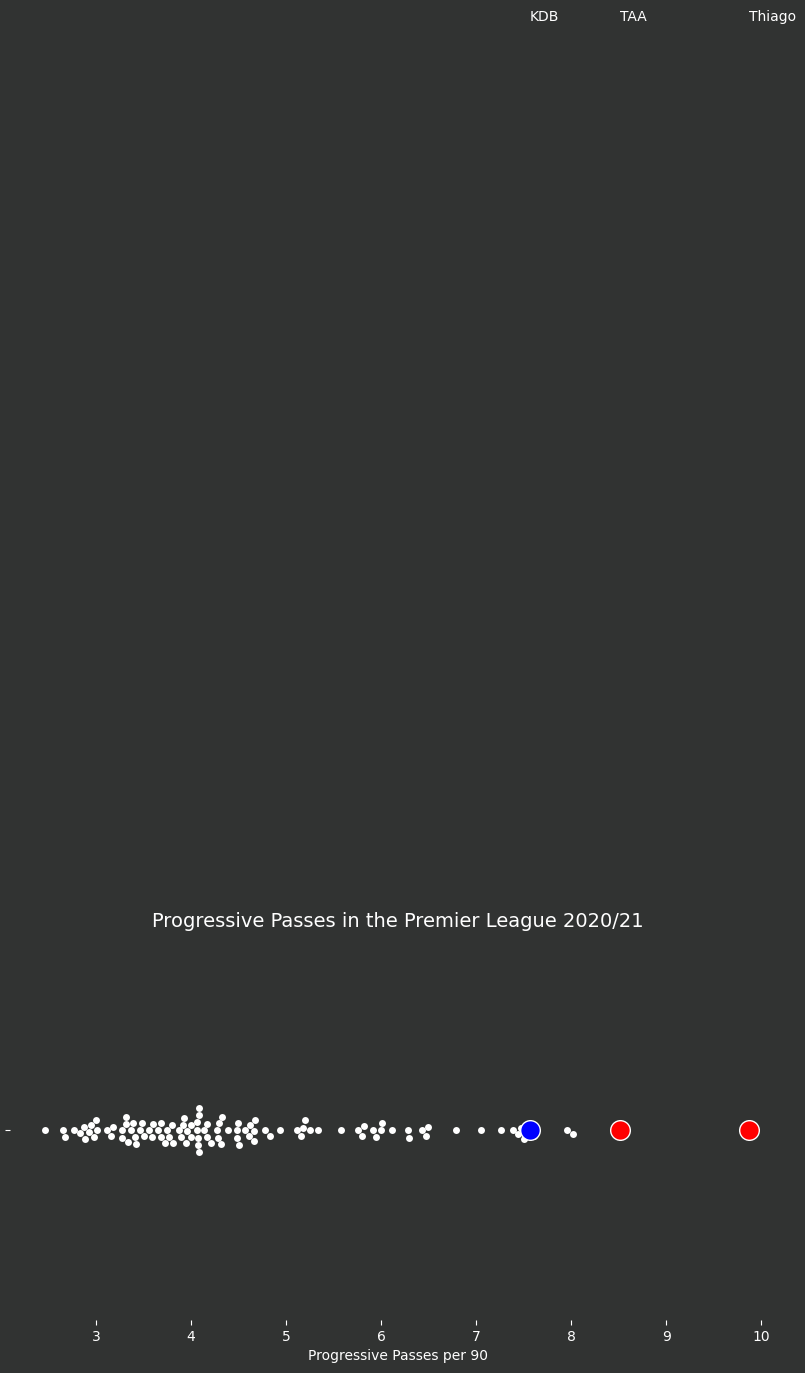

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

sns.swarmplot(x='per90',data=df,color='white',zorder=1)

#plot thiago
plt.scatter(x=9.87,y=0,c='red',edgecolor='white',s=200,zorder=2)
plt.text(s='Thiago',x=9.87,y=-.04,c=text_color)

#plot de bruyne
plt.scatter(x=8.512,y=0,c='red',edgecolor='white',s=200,zorder=2)
plt.text(s='TAA',x=8.512,y=-.04,c=text_color)

#plot de bruyne
plt.scatter(x=7.564,y=0,c='blue',edgecolor='white',s=200,zorder=2)
plt.text(s='KDB',x=7.564,y=-.04,c=text_color)

plt.title('Progressive Passes in the Premier League 2020/21',c=text_color,fontsize=14)

plt.xlabel('Progressive Passes per 90',c=text_color)



#plt.savefig('swarm.png',dpi=500,bbox_inches = 'tight',facecolor=background)
plt.savefig('../../output/ProgressivePass/Premire2020-2021',dpi=500,bbox_inches = 'tight',facecolor=background)

In [26]:
#import our next dataframe
df2 = pd.read_csv('../../data/ProgressivePass/ProgressivePass4.csv')

In [27]:
df2.head(10)

,Player,Nation,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,11.7,573,705,81.3,9485,4365,1,0.8,0.2,11,43,21,4,76
1,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,10.6,138,201,68.7,1925,327,1,0.9,0.1,8,12,2,0,11
2,Che Adams\Che-Adams,eng ENG,FW,Southampton,19.0,288,413,69.7,4739,1079,4,4.3,-0.3,22,20,12,0,38
3,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,18.0,779,905,86.1,18458,6406,0,0.1,-0.1,3,39,2,0,36
4,Adrián\Adrian,es ESP,GK,Liverpool,2.0,43,62,69.4,1147,723,0,0.0,0.0,0,0,0,0,0
5,Sergio Agüero\Sergio-Aguero,ar ARG,FW,Manchester City,1.6,33,42,78.6,386,58,0,0.6,-0.6,3,2,1,0,1
6,Ola Aina\Ola-Aina,ng NGA,DF,Fulham,17.7,782,1013,77.2,15293,6132,0,0.3,-0.3,8,66,11,6,69
7,Rayan Aït Nouri\Rayan-Ait-Nouri,fr FRA,DF,Wolves,7.7,299,357,83.8,4712,1364,1,0.7,0.3,6,13,6,3,18
8,Semi Ajayi\Semi-Ajayi,ng NGA,DF,West Brom,22.0,553,763,72.5,12087,5164,0,0.1,-0.1,2,50,3,0,46
9,Nathan Aké\Nathan-Ake,nl NED,DF,Manchester City,5.2,429,461,93.1,7845,2158,0,0.0,0.0,1,36,0,0,23


In [28]:
#do some data preprocessing and cleaning

#split the player names
df2['Player'] = df2['Player'].str.split('\\',expand=True)[0]

df2 = df2[df2['Pos'] != 'GK']

df2 = df2[df2['90s'] > 6.5].reset_index()

df2

,index,Player,Nation,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,0,Patrick van Aanholt,nl NED,DF,Crystal Palace,11.7,573,705,81.3,9485,4365,1,0.8,0.2,11,43,21,4,76
1,1,Tammy Abraham,eng ENG,FW,Chelsea,10.6,138,201,68.7,1925,327,1,0.9,0.1,8,12,2,0,11
2,2,Che Adams,eng ENG,FW,Southampton,19.0,288,413,69.7,4739,1079,4,4.3,-0.3,22,20,12,0,38
3,3,Tosin Adarabioyo,eng ENG,DF,Fulham,18.0,779,905,86.1,18458,6406,0,0.1,-0.1,3,39,2,0,36
4,6,Ola Aina,ng NGA,DF,Fulham,17.7,782,1013,77.2,15293,6132,0,0.3,-0.3,8,66,11,6,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,490,Wilfried Zaha,ci CIV,FW,Crystal Palace,18.5,381,503,75.7,5524,1211,2,2.0,0.0,15,16,20,3,39
280,491,Andre-Frank Zambo Anguissa,cm CMR,MF,Fulham,18.7,811,949,85.5,13822,3413,3,1.8,1.2,19,102,13,4,74
281,493,Oleksandr Zinchenko,ua UKR,DF,Manchester City,7.1,572,633,90.4,9341,2526,0,0.1,-0.1,1,43,8,0,39
282,494,Hakim Ziyech,ma MAR,FWMF,Chelsea,7.0,352,470,74.9,6238,1666,3,2.3,0.7,17,33,19,4,42


In [29]:
#新しくstatsを追加して評価基準を増やす
#make the per 90 stats
#metrics = ['Prog90','1/390','xA90','Cmp%','KP90','PPA90']
df2['Prog'] = df2['Prog'] / df2['90s']
df2['1/3'] = df2['1/3'] / df2['90s']
df2['xA'] = df2['xA'] / df2['90s']
df2['KP'] = df2['KP'] / df2['90s']
df2['PPA'] = df2['PPA'] / df2['90s']

In [30]:
print(df2.head())

df2.Player.unique()

   index               Player   Nation Pos           Squad   90s  Cmp   Att  \
0      0  Patrick van Aanholt   nl NED  DF  Crystal Palace  11.7  573   705   
1      1        Tammy Abraham  eng ENG  FW         Chelsea  10.6  138   201   
2      2            Che Adams  eng ENG  FW     Southampton  19.0  288   413   
3      3     Tosin Adarabioyo  eng ENG  DF          Fulham  18.0  779   905   
4      6             Ola Aina   ng NGA  DF          Fulham  17.7  782  1013   

   Cmp%  TotDist  PrgDist  Ast        xA  A-xA        KP       1/3       PPA  \
0  81.3     9485     4365    1  0.068376   0.2  0.940171  3.675214  1.794872   
1  68.7     1925      327    1  0.084906   0.1  0.754717  1.132075  0.188679   
2  69.7     4739     1079    4  0.226316  -0.3  1.157895  1.052632  0.631579   
3  86.1    18458     6406    0  0.005556  -0.1  0.166667  2.166667  0.111111   
4  77.2    15293     6132    0  0.016949  -0.3  0.451977  3.728814  0.621469   

   CrsPA      Prog  
0      4  6.495726  
1 

array(['Patrick van Aanholt', 'Tammy Abraham', 'Che Adams',
       'Tosin Adarabioyo', 'Ola Aina', 'Rayan Aït Nouri', 'Semi Ajayi',
       'Marc Albrighton', 'Thiago Alcántara', 'Toby Alderweireld',
       'Trent Alexander-Arnold', 'Ezgjan Alioski', 'Allan',
       'Miguel Almirón', 'Steven Alzate', 'Ethan Ampadu',
       'Joachim Andersen', 'Michail Antonio', 'Stuart Armstrong',
       'Pierre-Emerick Aubameyang', 'Serge Aurier', 'Jordan Ayew',
       'Luke Ayling', 'César Azpilicueta', 'Fabián Balbuena',
       'George Baldock', 'Patrick Bamford', 'Ross Barkley',
       'Ashley Barnes', 'Harvey Barnes', 'Kyle Bartley', 'Chris Basham',
       'Michy Batshuayi', 'Jan Bednarek', 'Héctor Bellerín',
       'Saïd Benrahma', 'Christian Benteke', 'Jóhann Berg Guðmundsson',
       'Sander Berge', 'Steven Bergwijn', 'Ryan Bertrand',
       'Yves Bissouma', 'Jayden Bogle', 'Willy Boly', 'Jarrod Bowen',
       'Robbie Brady', 'Rhian Brewster', 'Josh Brownhill', 'Oliver Burke',
       'Dan Burn',

In [31]:
#create a list of 6 metrics to compare
metrics = ['Prog','1/3','xA','Cmp%','KP','PPA']

findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Font family 'Andale Mono' not found.
findfont: Fon

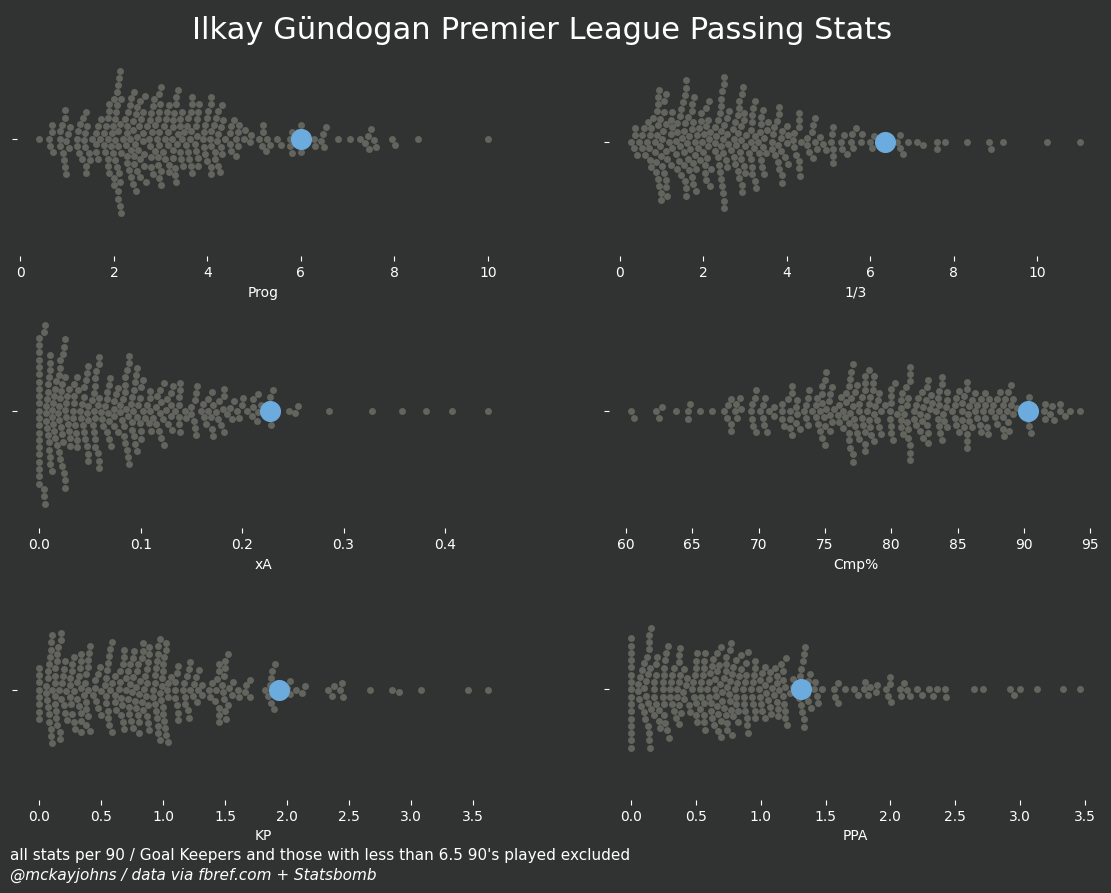

In [32]:
fig,axes = plt.subplots(3,2,figsize=(14,10))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

#create a list of comparisons
counter=0
counter2=0
met_counter = 0

for i,ax in zip(df2['Player'],axes.flatten()):
    ax.set_facecolor(background)
    ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
    
    spines = ['top','bottom','left','right']
    for x in spines:
        if x in spines:
            ax.spines[x].set_visible(False)
            
    sns.swarmplot(x=metrics[met_counter],data=df2,ax=axes[counter,counter2],zorder=1,color='#64645e')
    ax.set_xlabel(f'{metrics[met_counter]}',c='white')
    
    for x in range(len(df2['Player'])):
        #if df2['Player'][x] == 'Thiago Alcántara':
            #ax.scatter(x=df2[metrics[met_counter]][x],y=0,s=200,c='red',zorder=2)
        if df2['Player'][x] == 'İlkay Gündoğan':
            ax.scatter(x=df2[metrics[met_counter]][x],y=0,s=200,c='#6CABDD',zorder=2)
                        
    met_counter+=1
    if counter2 == 0:
        counter2 = 1
        continue
    if counter2 == 1:
        counter2 = 0
        counter+=1
        

        
s='<Ilkay Gündogan> Premier League Passing Stats'
highlight_text.fig_text(s=s,
                x=.25, y=.88,
                #highlight_weights = ['bold'],
                fontsize=22,
                fontfamily = 'Andale Mono',
                color = text_color,
                # highlight_colors = ['#6CABDD'],
                va='center'
               )

fig.text(.12,.05,"all stats per 90 / Goal Keepers and those with less than 6.5 90's played excluded",fontsize=11, fontfamily='Andale Mono',color=text_color)
fig.text(.12,.03,"@mckayjohns / data via fbref.com + Statsbomb", fontstyle='italic',fontsize=11, fontfamily='Andale Mono',color=text_color)

#plt.savefig('swarm.png',dpi=500,bbox_inches = 'tight',facecolor=background)
plt.savefig('../../output/ProgressivePass/IlkayGundogan',dpi=500,bbox_inches = 'tight',facecolor=background)